In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')

plt.style.use('ggplot')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/guilima/nltk_data...
[nltk_data]    |   Package movie_reviews is a

In [4]:
#Read in data
comments_df = pd.read_csv('all_comments.tsv',sep='\t')
print(comments_df.shape)

/var/folders/k8/5m27ck896cg02z89ccn0k57m0000gn/T/ipykernel_26705/2137283773.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv('all_comments.tsv',sep='\t')


(10697533, 8)


In [5]:
#Downsample data
df = comments_df.head(500)
print(df.head)
print(df.shape)

<bound method NDFrame.head of     Unnamed: 0       id                author  \
0            0  f4deplg                Haus42   
1            1  f4d79bi        PotatoPrince84   
2            2  f4ddmlk  MadeToAchieveBalance   
3            3  f4dknfn              MrBigRed   
4            4  f4dgdur         burritosenior   
..         ...      ...                   ...   
495        530  f1bgyg6               Brillek   
496        531  f1b1c4s          Iron_Wolf123   
497        532  f1b4gxs         nwordcountbot   
498        533  f1aonzf               eab0036   
499        534  f1arrjh         nwordcountbot   

                                                  body isTopLevel   parent_id  \
0    Scroll, scroll, scroll.  Pause.  Scroll back u...       True   t3_dkdml1   
1    A lot of the people who felt quite strongly ab...       True   t3_dkdml1   
2    T H E   S P H E R E   S H A L L   R I S E   A ...       True   t3_dkdml1   
3                         All hail the cube of justice   

In [52]:
for col in df :
    print(col)

Unnamed: 0
id
author
body
isTopLevel
parent_id
submission_id
ups


In [6]:
df['body'].values[0]

'Scroll, scroll, scroll.  Pause.  Scroll back up.  Check which subreddit this article is in.  Nod in approval.  Upvote.  Continue scrolling.'

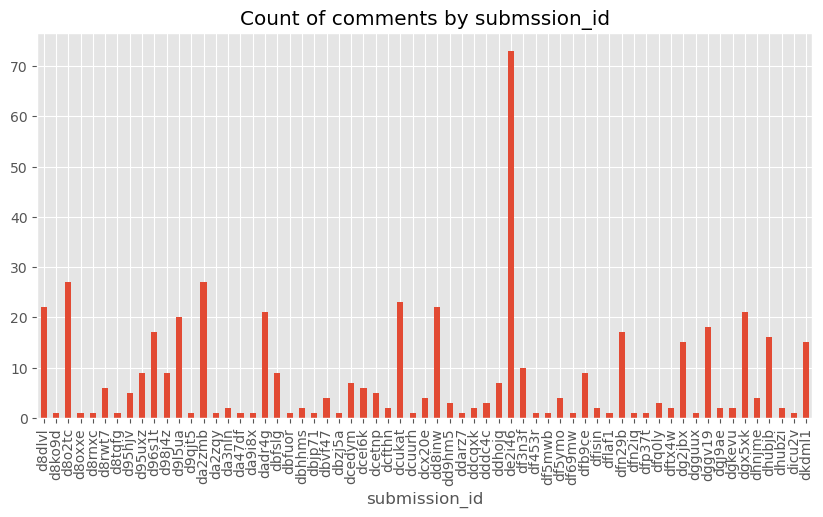

In [7]:
ax = df['submission_id'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of comments by submssion_id',
          figsize=(10, 5))
ax.set_xlabel('submission_id')
plt.show()

In [34]:
#250th comment
example = df['body'][0]
print(example)

Scroll, scroll, scroll.  Pause.  Scroll back up.  Check which subreddit this article is in.  Nod in approval.  Upvote.  Continue scrolling.


In [35]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Scroll', ',', 'scroll', ',', 'scroll', '.', 'Pause', '.', 'Scroll', 'back']

In [36]:
#Find part of speech for each token
tagged = nltk.tag.pos_tag(tokens)
tagged[:10]


[('Scroll', 'NNP'),
 (',', ','),
 ('scroll', 'NN'),
 (',', ','),
 ('scroll', 'NN'),
 ('.', '.'),
 ('Pause', 'NNP'),
 ('.', '.'),
 ('Scroll', 'NNP'),
 ('back', 'RB')]

In [37]:
entitties = nltk.chunk.ne_chunk(tagged)
entitties.pprint()

(S
  (GPE Scroll/NNP)
  ,/,
  scroll/NN
  ,/,
  scroll/NN
  ./.
  (PERSON Pause/NNP)
  ./.
  (PERSON Scroll/NNP)
  back/RB
  up/RB
  ./.
  (PERSON Check/NNP)
  which/WDT
  subreddit/NN
  this/DT
  article/NN
  is/VBZ
  in/IN
  ./.
  Nod/NNP
  in/IN
  approval/NN
  ./.
  (PERSON Upvote/NNP)
  ./.
  Continue/NNP
  scrolling/VBG
  ./.)


In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [39]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [40]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [41]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4767}

In [67]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['body']
    myid = row['Unnamed: 0']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [80]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Unnamed: 0'})
vaders = vaders.merge(df, how='left')


In [81]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,id,author,body,isTopLevel,parent_id,submission_id,ups
0,0,0.000,0.860,0.140,0.4767,f4deplg,Haus42,"Scroll, scroll, scroll. Pause. Scroll back u...",True,t3_dkdml1,dkdml1,162.0
1,1,0.081,0.722,0.198,0.9041,f4d79bi,PotatoPrince84,A lot of the people who felt quite strongly ab...,True,t3_dkdml1,dkdml1,84.0
2,2,0.000,0.000,0.000,0.0000,f4ddmlk,MadeToAchieveBalance,T H E S P H E R E S H A L L R I S E A ...,True,t3_dkdml1,dkdml1,34.0
3,3,0.000,0.460,0.540,0.5719,f4dknfn,MrBigRed,All hail the cube of justice,True,t3_dkdml1,dkdml1,9.0
4,4,0.000,0.323,0.677,0.6369,f4dgdur,burritosenior,That is glorious.,True,t3_dkdml1,dkdml1,4.0


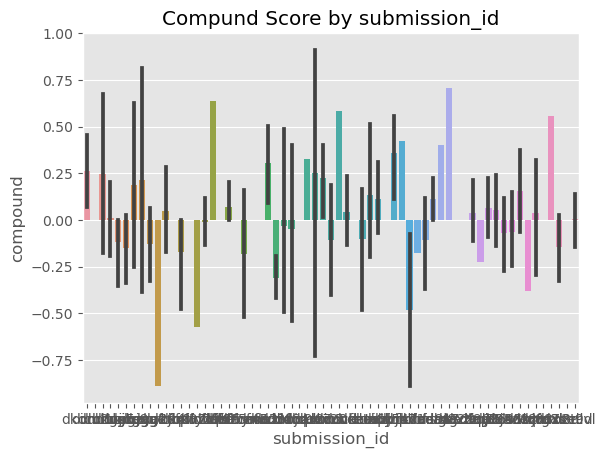

In [86]:
ax = sns.barplot(data=vaders, x='submission_id', y='compound')
ax.set_title('Compund Score by submission_id')
plt.show()


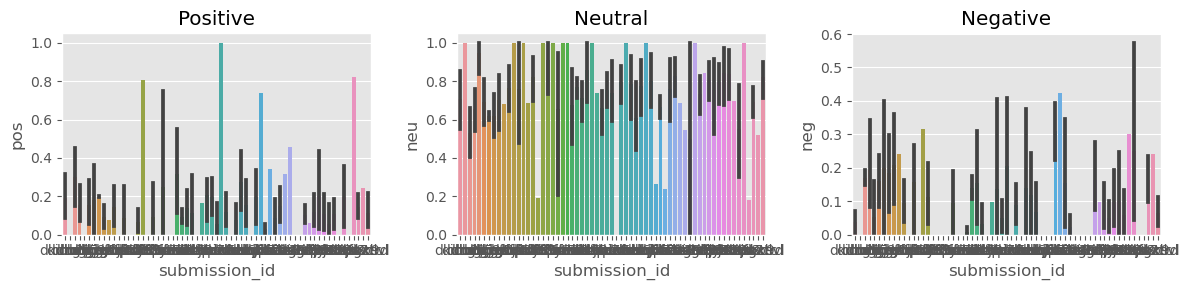

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='submission_id', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='submission_id', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='submission_id', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()